In [154]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Loading Preprocessed Power and Weather Dataset

In [157]:
df = pd.read_csv("powerpulse_weather_preprocessed.csv")

MemoryError: Unable to allocate 111. MiB for an array with shape (7, 2075259) and data type float64

In [110]:
df.head(2)

,datetime,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,...,Submetered_energy,Unmetered_energy,season,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,...,18.0,52.27,Winter,7.0,4.8,86.0,0.4,320.0,22.3,1025.9
1,2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,...,17.0,72.33,Winter,7.0,4.8,86.0,0.4,320.0,22.3,1025.9


In [111]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.drop(columns=['Date', 'Time', 'day'], inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 28 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Global_active_power               float64
 1   Global_reactive_power             float64
 2   Voltage                           float64
 3   Global_intensity                  float64
 4   Sub_metering_1                    float64
 5   Sub_metering_2                    float64
 6   Sub_metering_3                    float64
 7   year                              int64  
 8   month                             int64  
 9   date                              int64  
 10  hour                              int64  
 11  minute                            int64  
 12  is_weekend                        bool   
 13  daily_average                     float64
 14  peak_hours                        float64
 15  rolling_avg_1h                    float64
 16  rol

In [113]:
df.shape

(2075259, 28)

In [114]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'year', 'month', 'date', 'hour', 'minute',
       'is_weekend', 'daily_average', 'peak_hours', 'rolling_avg_1h',
       'rolling_avg_12h', 'global_active_energy_consumption',
       'Submetered_energy', 'Unmetered_energy', 'season', 'temp', 'dwpt',
       'rhum', 'prcp', 'wdir', 'wspd', 'pres'],
      dtype='object')

## Applying one hot encoding on season

In [116]:
# Initializing OHE
season_encoder = OneHotEncoder(drop=None, sparse_output=False)

season_ohe = season_encoder.fit_transform(df[['season']])

#Get new columns
season_ohe_cols = season_encoder.get_feature_names_out(['season'])

# Covert to df
season_df = pd.DataFrame(season_ohe, columns=season_ohe_cols, index=df.index)

# Drop Original season and add OHE season columns
df = pd.concat([df.drop(columns=['season']), season_df], axis=1)

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,date,...,dwpt,rhum,prcp,wdir,wspd,pres,season_Autumn,season_Spring,season_Summer,season_Winter
datetime,,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,...,4.8,86.0,0.4,320.0,22.3,1025.9,0.0,0.0,0.0,1.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,...,4.8,86.0,0.4,320.0,22.3,1025.9,0.0,0.0,0.0,1.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,...,4.8,86.0,0.4,320.0,22.3,1025.9,0.0,0.0,0.0,1.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,...,4.8,86.0,0.4,320.0,22.3,1025.9,0.0,0.0,0.0,1.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,...,4.8,86.0,0.4,320.0,22.3,1025.9,0.0,0.0,0.0,1.0


In [117]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'year', 'month', 'date', 'hour', 'minute',
       'is_weekend', 'daily_average', 'peak_hours', 'rolling_avg_1h',
       'rolling_avg_12h', 'global_active_energy_consumption',
       'Submetered_energy', 'Unmetered_energy', 'temp', 'dwpt', 'rhum', 'prcp',
       'wdir', 'wspd', 'pres', 'season_Autumn', 'season_Spring',
       'season_Summer', 'season_Winter'],
      dtype='object')

# Model Training

## Selecting Features and Target

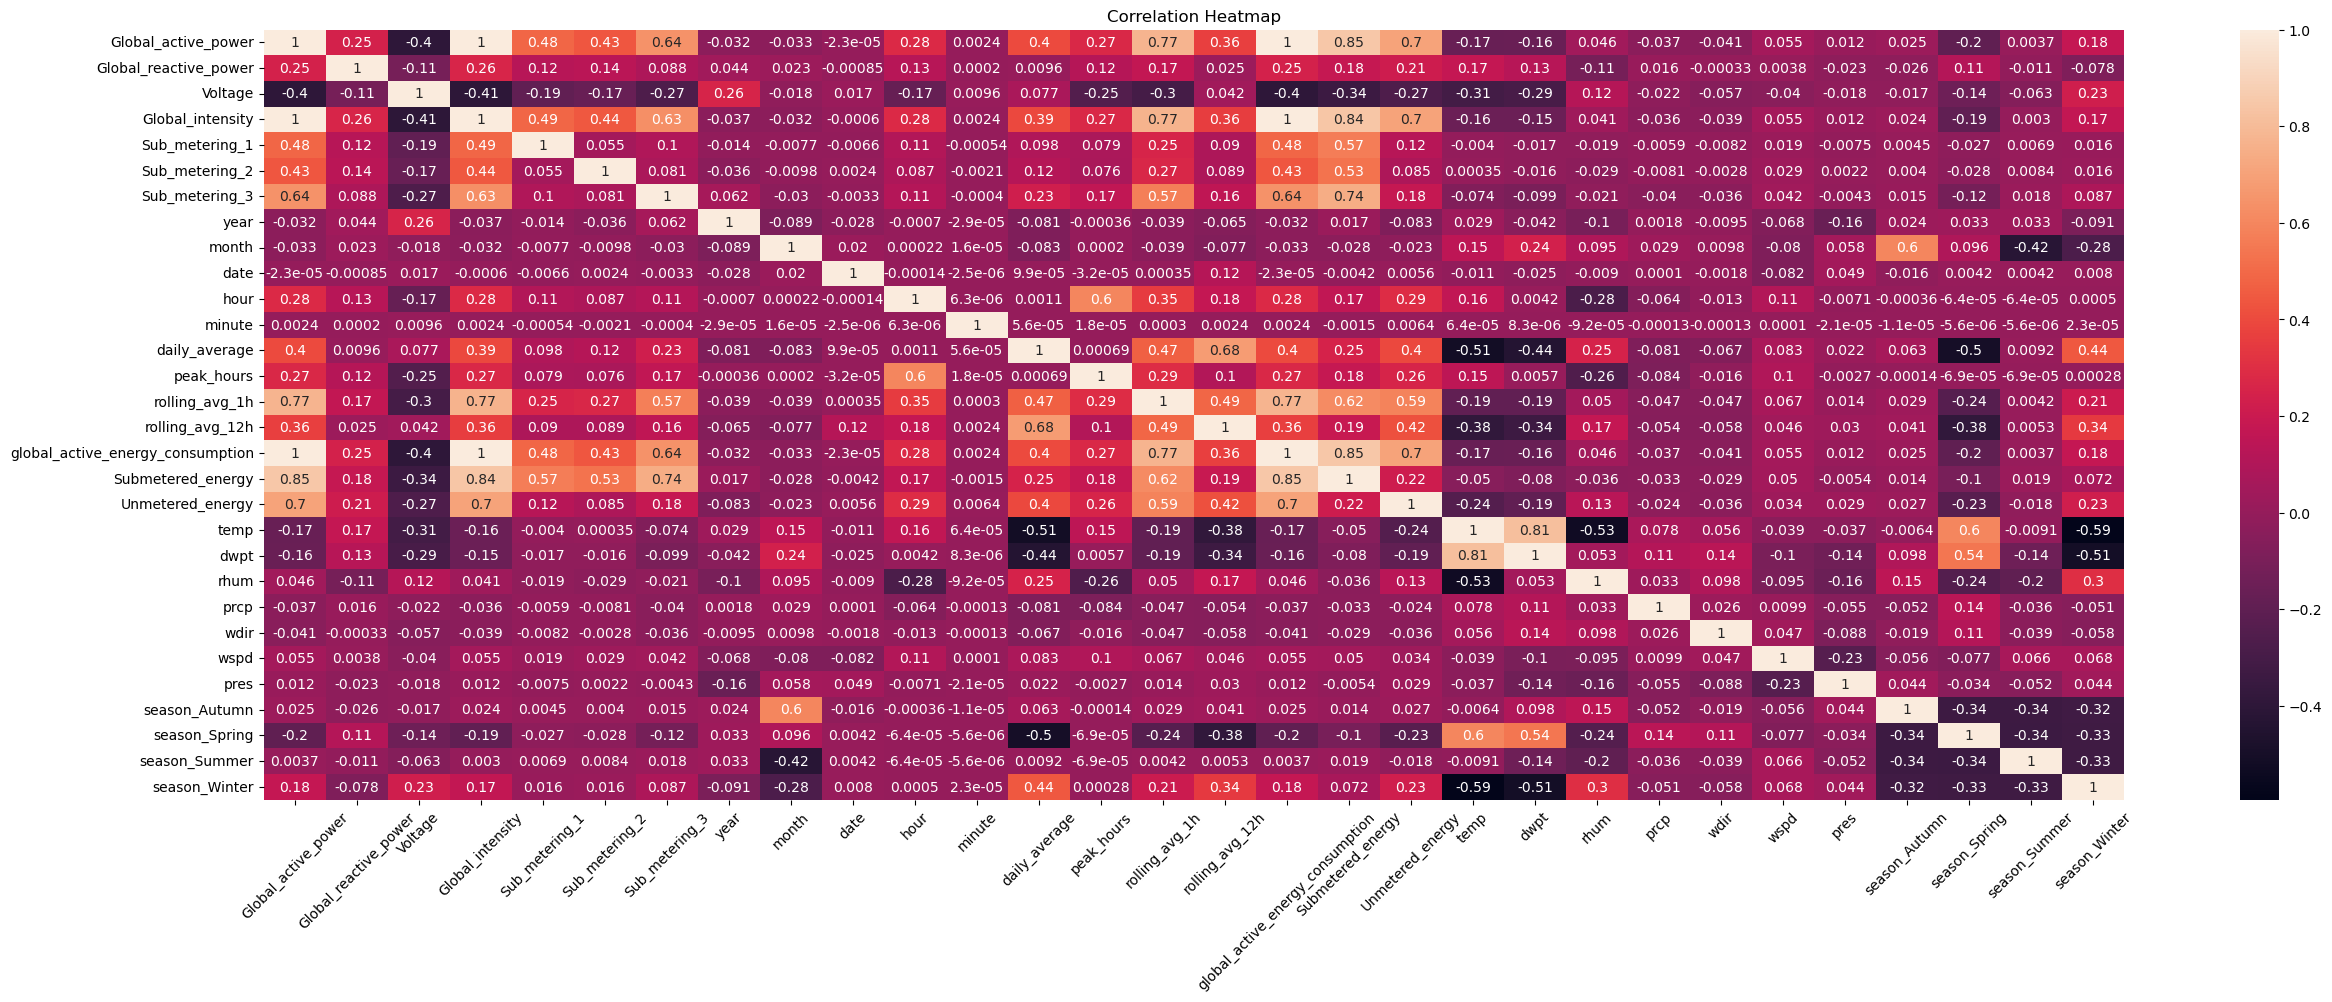

In [13]:
# correlation heatmap

num_col = df.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(30, 10))
ax = sns.heatmap(df[num_col].corr(), annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Correlation Heatmap")
plt.show()

CORRELATION INSIGHTS

    * Dropping Global_intensity and global_active_energy_consumption since correlation is equal to 1 with Global_active_power

In [121]:
exclude_features = ["global_active_energy_consumption" , "Global_intensity"]

target = "Global_active_power"

features = [col for col in df.columns if col not in exclude_features + [target]]

In [129]:
print("Features : ", features)
print("\nTarget : ", target)

Features :  ['Global_reactive_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'year', 'month', 'date', 'hour', 'minute', 'is_weekend', 'daily_average', 'peak_hours', 'rolling_avg_1h', 'rolling_avg_12h', 'Submetered_energy', 'Unmetered_energy', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter']

Target :  Global_active_power


## Train and Test Split

In [132]:
# Training dataset : 80% and testing dataset : 20%
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42, shuffle=True)

In [133]:
print(df[features].shape, df[target].shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2075259, 28) (2075259,)
(1660207, 28) (1660207,)
(415052, 28) (415052,)


## Feature Scaling

In [135]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [139]:
# fit transform only on training data
X_train_scaled = scaler.fit_transform(X_train)

# transform test data
X_test_scaled = scaler.transform(X_test)

# 1. LINEAR REGRESSION

In [189]:
print("LR Training begins at ",pd.Timestamp.now())

# Initialize model
lr = LinearRegression()

lr.fit(X_train, y_train)

print("LR Training completed at ",pd.Timestamp.now())

LR Training begins at  2025-08-20 16:03:51.516546
LR Training completed at  2025-08-20 16:03:56.672405


In [25]:
print(lr)

LinearRegression()


In [141]:
# Time Series Split for Tuning
tcsv = TimeSeriesSplit(n_splits=3)

# 2. RANDOM FOREST

In [ ]:
print("RF Training begins at ",pd.Timestamp.now())

# Initialize model
rf = RandomForestRegressor(random_state=42, verbose=True)

# Defining hyperparamater Grid 
rf_param = {"n_estimators" : [15, 20], # number of trees
            "max_depth" : [5, 15]} # tree depth

# Apply GridSearchCV for tuning
rf_opt = GridSearchCV(rf, 
                       rf_param, 
                       cv=tcsv, 
                       n_jobs=-1, # use full CPU
                       verbose=2,
                       scoring="neg_root_mean_squared_error")  

rf_opt.fit(X_train_scaled, y_train)

# Best Param Estimator for RF
best_rf = rf_opt.best_estimator_

print("RF Training completed at ",pd.Timestamp.now())

In [46]:
print(best_rf)

RandomForestRegressor(max_depth=15, n_estimators=15, random_state=42,
                      verbose=True)


# 3. GRADIENT BOOSTING

In [48]:
print("GB Training begins at ",pd.Timestamp.now())

# Initialize model
gb = GradientBoostingRegressor(random_state=42)

# Defining hyperparameter grid
gb_param = {"n_estimators" : [10, 15],
            "max_depth" : [5, 15],
            "learning_rate" : [0.05, 0.1]}

gb_opt = GridSearchCV(gb,
                       gb_param,
                       cv = tcsv,
                       n_jobs=1,
                       verbose=2,
                       scoring="neg_root_mean_squared_error")

gb_opt.fit(X_train_scaled, y_train)

# Best Param Estimator for GB
best_gb = gb_opt.best_estimator_

print("GB Training completed at ",pd.Timestamp.now())

GB Training begins at  2025-08-20 06:17:28.850372
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=10; total time=  54.6s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=10; total time= 2.0min
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=10; total time= 3.2min
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=15; total time= 1.5min
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=15; total time= 2.9min
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=15; total time= 4.6min
[CV] END ..learning_rate=0.05, max_depth=15, n_estimators=10; total time= 2.6min
[CV] END ..learning_rate=0.05, max_depth=15, n_estimators=10; total time= 5.3min
[CV] END ..learning_rate=0.05, max_depth=15, n_estimators=10; total time= 8.4min
[CV] END ..learning_rate=0.05, max_depth=15, n_estimators=15; total time= 3.9min
[CV] END ..learning_rate=0.05, max_depth=15, n_estimators=15; total time= 8.0min

In [50]:
print(best_gb)

GradientBoostingRegressor(max_depth=15, n_estimators=15, random_state=42)


# 4. NEURAL NETWORKS

In [ ]:
print("NN Training begins at ",pd.Timestamp.now())

# Initialize Model
nn = MLPRegressor(max_iter=200, random_state=42, early_stopping=True, verbose=True)

nn_param = {'hidden_layer_sizes': [(8,), (16, 8)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001]}

nn_opt = GridSearchCV(
    estimator=nn,
    param_grid=nn_param,
    cv=tcsv,
    n_jobs=1,
    verbose=True,
    scoring="neg_root_mean_squared_error"
)

nn_opt.fit(X_train_scaled, y_train)

# Best Param Estimator For NN
best_nn = nn_opt.best_estimator_

print(pd.Timestamp.now())

NN Training begins at  2025-08-20 09:33:14.863287
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Iteration 1, loss = 0.07585977
Iteration 2, loss = 0.00117588
Iteration 3, loss = 0.00022311
Iteration 4, loss = 0.00005062
Iteration 5, loss = 0.00000645
Iteration 6, loss = 0.00000320
Iteration 7, loss = 0.00000320
Iteration 8, loss = 0.00000304
Iteration 9, loss = 0.00000326
Iteration 10, loss = 0.00000279
Iteration 11, loss = 0.00000277
Iteration 12, loss = 0.00000273
Iteration 13, loss = 0.00000262
Iteration 14, loss = 0.00000259
Iteration 15, loss = 0.00000264
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.03810140
Iteration 2, loss = 0.00016613
Iteration 3, loss = 0.00001946
Iteration 4, loss = 0.00000587
Iteration 5, loss = 0.00000360
Iteration 6, loss = 0.00000299
Iteration 7, loss = 0.00000279
Iteration 8, loss = 0.00000274
Iteration 9, loss = 0.00000254
Iteration 10, loss = 0.00000257
Iteration 11, loss

C:\Users\snega\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [159]:
print(best_nn)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(8,), random_state=42,
             verbose=True)


# MODEL EVALUATION

## Predict Output from Tuned Regression Models

In [191]:
y_pred_lr = lr.predict(X_test)

In [52]:
y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_gb = best_gb.predict(X_test_scaled)
y_pred_nn = best_nn.predict(X_test_scaled)

## Calculate Evalution Metrics for Each Regression Models

In [203]:
results_lr = {"Model" : "Linear Regression",
              "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred_lr)),
              "MAE" : mean_absolute_error(y_test, y_pred_lr),
              "R2" : r2_score(y_test, y_pred_lr)}
results_lr

{'Model': 'Linear Regression',
 'RMSE': 0.00016345343548622847,
 'MAE': 0.0001338420011357769,
 'R2': 0.9999999758994013}

In [205]:
results_rf = {"Model" : "Random Forest",
              "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              "MAE" : mean_absolute_error(y_test, y_pred_rf),
              "R2" : r2_score(y_test, y_pred_rf)}
results_rf

{'Model': 'Random Forest',
 'RMSE': 0.003382529515293675,
 'MAE': 0.0004512216303527895,
 'R2': 0.999989678972969}

In [207]:
results_gb = {"Model" : "Gradient Boosting",
              "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred_gb)),
              "MAE" : mean_absolute_error(y_test, y_pred_gb),
              "R2" : r2_score(y_test, y_pred_gb)}
results_gb

{'Model': 'Gradient Boosting',
 'RMSE': 0.2168264163926821,
 'MAE': 0.16786131987559144,
 'R2': 0.9575904064859917}

In [209]:
results_nn = {"Model" : "Neural Networks",
              "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred_nn)),
              "MAE" : mean_absolute_error(y_test, y_pred_nn),
              "R2" : r2_score(y_test, y_pred_nn)}
results_nn

{'Model': 'Neural Networks',
 'RMSE': 0.000406305135135088,
 'MAE': 0.0003050578447705893,
 'R2': 0.9999998510829761}

In [195]:
result_df = pd.DataFrame([results_lr, results_rf, results_gb]).sort_values(by='RMSE')

In [177]:
res = pd.concat([result_df, result_df1], ignore_index=True).sort_values(by='RMSE')
res

,Model,RMSE,MAE,R2
0,Linear Regression,0.000163,0.000134,1.00000
3,Neural Networks,0.000406,0.000305,1.00000
1,Random Forest,0.003383,0.000451,0.99999
2,Gradient Boosting,0.216826,0.167861,0.95759


In [67]:
X = df[features]
y = df[target]

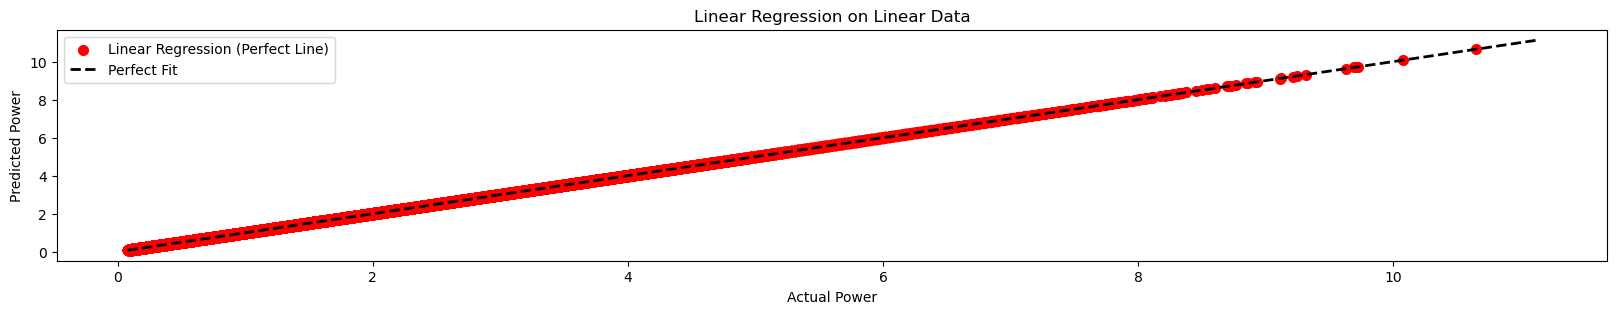

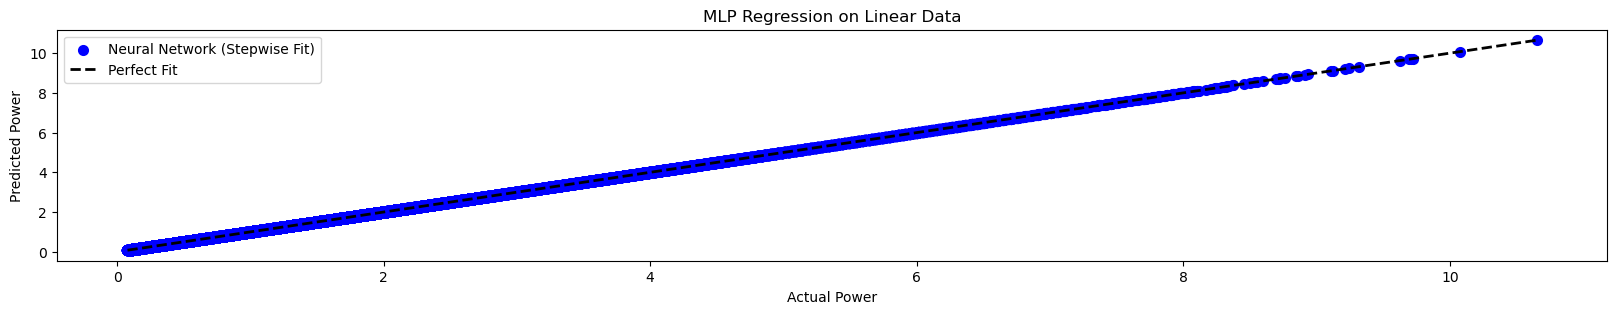

In [179]:
plt.figure(figsize=(20, 3))
plt.scatter(y_test, y_pred_lr, label="Linear Regression", color="red", linewidth=2)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label="Perfect Fit")
plt.legend()
plt.title("Linear Regression on Linear Data")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.show()

plt.figure(figsize=(20, 3))
plt.scatter(y_test, y_pred_nn, label="Neural Network", color="blue", linewidth=2)
plt.plot([y_test.min(), y_test.max()], [y_pred_lr.min(), y_pred_lr.max()], 'k--', lw=2, label="Perfect Fit")
plt.legend()
plt.title("MLP Regression on Linear Data")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.show()